## VCB

In [379]:
stock_code = "VCB.VN"

In [380]:
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.download(tickers=stock_code, start="2015-01-01", end="2024-03-27")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,15582.061523,15778.680664,15434.597656,15680.371094,15680.371094,630678
2015-01-06,15680.371094,16712.621094,15680.371094,16712.621094,16712.621094,3427132
2015-01-07,16761.775391,17007.550781,16270.228516,16516.001953,16516.001953,3182476
2015-01-08,16565.156250,17204.169922,16516.001953,17007.550781,17007.550781,2043014
2015-01-09,17155.013672,18187.263672,17155.013672,18138.109375,18138.109375,5155103
...,...,...,...,...,...,...
2024-03-20,92500.000000,94100.000000,92500.000000,93200.000000,93200.000000,970900
2024-03-21,94000.000000,95500.000000,94000.000000,95200.000000,95200.000000,1694100
2024-03-22,95200.000000,96800.000000,95200.000000,96400.000000,96400.000000,1889000


In [381]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2.295000e+03
mean,48718.397282,49307.428002,48156.546931,48755.823586,48755.823586,2.040670e+06
std,21818.698599,22021.682447,21586.885734,21834.795237,21834.795237,1.545021e+06
min,15582.061523,15778.680664,15434.597656,15680.371094,15680.371094,1.859200e+05
25%,25314.705078,25560.480469,25068.931641,25249.576172,25249.576172,1.138525e+06
50%,48309.308594,49304.691406,47778.433594,48773.820312,48773.820312,1.670878e+06
75%,65695.351562,66292.578125,64804.148438,65695.351562,65695.351562,2.537502e+06
max,98500.000000,100500.000000,97300.000000,97400.000000,97400.000000,3.407681e+07


In [382]:
import numpy as np

In [383]:
dataset = data[['Close']]
dataset

,Close
Date,
2015-01-05,15680.371094
2015-01-06,16712.621094
2015-01-07,16516.001953
2015-01-08,17007.550781
2015-01-09,18138.109375
...,...
2024-03-20,93200.000000
2024-03-21,95200.000000
2024-03-22,96400.000000


In [384]:
dataset['Lag1'] = dataset['Close'].shift(1)
dataset = dataset.dropna()
dataset

C:\Users\vanma\AppData\Local\Temp\ipykernel_14772\696873637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lag1'] = dataset['Close'].shift(1)


,Close,Lag1
Date,,
2015-01-06,16712.621094,15680.371094
2015-01-07,16516.001953,16712.621094
2015-01-08,17007.550781,16516.001953
2015-01-09,18138.109375,17007.550781
2015-01-12,18285.574219,18138.109375
...,...,...
2024-03-20,93200.000000,92500.000000
2024-03-21,95200.000000,93200.000000
2024-03-22,96400.000000,95200.000000


**Spread dataset**

In [385]:
train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset) * 0.2)
val_size = int(len(dataset) * 0.1)

train_size, test_size, val_size

(1605, 458, 229)

In [386]:
train_data = dataset[:train_size]
test_data = dataset[train_size:train_size+test_size]
val_data = dataset[train_size+test_size:]

train_data.shape, test_data.shape, val_data.shape

((1605, 2), (458, 2), (231, 2))

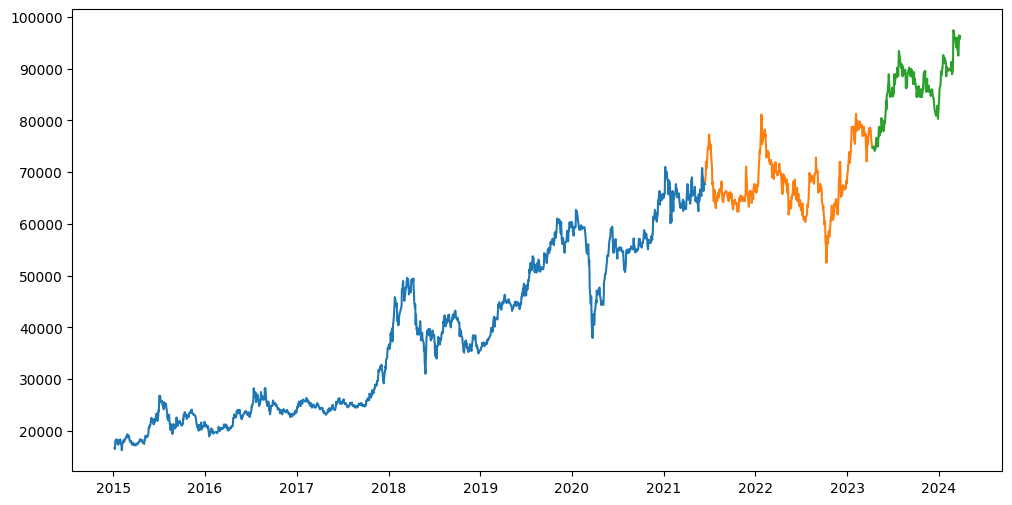

In [387]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')

**Close = Intercept + Beta * lag1**

In [388]:
X_train = train_data['Lag1'].values
Y_train = train_data['Close'].values

In [389]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train.reshape(-1,1), Y_train)
model.score(X_train.reshape(-1,1), Y_train)

0.9974523762429299

In [390]:
lag1_test = test_data['Lag1'].values.reshape(-1,1)

close_price_test = model.predict(lag1_test)
close_price_test
test_data['Close Predict'] = close_price_test.reshape(-1,1)

C:\Users\vanma\AppData\Local\Temp\ipykernel_14772\803965305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Close Predict'] = close_price_test.reshape(-1,1)


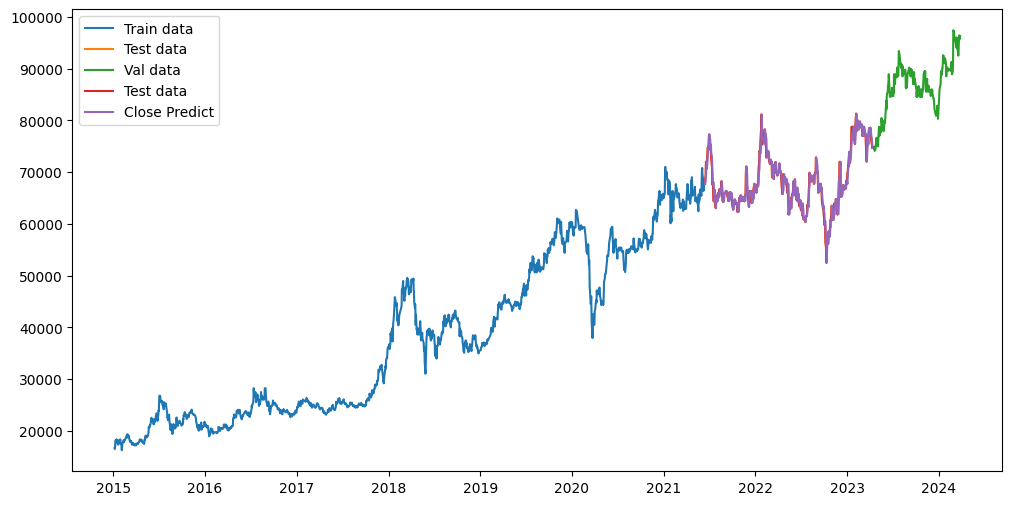

In [391]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(test_data['Close Predict'], label='Close Predict')
plt.legend()
plt.show()

**Close Price prediction up to now**

In [392]:
data_forecasting = yf.download(tickers=stock_code, start="2024-03-27")
data_forecasting
data_forecasting_test = data_forecasting['Close']
data_forecasting_test = data_forecasting_test.values.reshape(-1,1)

[*********************100%%**********************]  1 of 1 completed


In [393]:
data_forecasting_test_predict = model.predict(data_forecasting_test)
data_forecasting_test_predict = data_forecasting_test_predict.reshape(-1,1)

In [394]:
data_forecasting['Close Predict'] = data_forecasting_test_predict


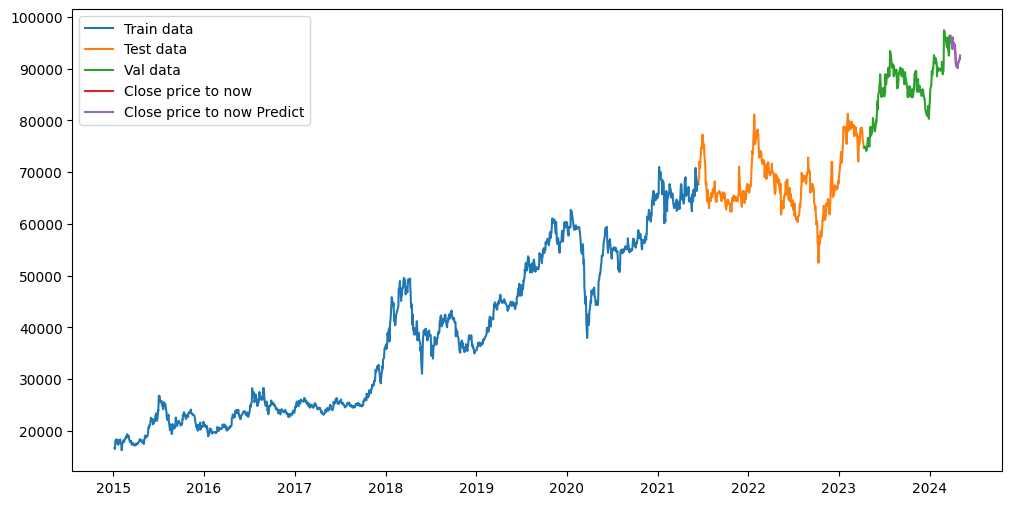

In [395]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')
plt.plot(data_forecasting['Close'], label='Close price to now')
plt.plot(data_forecasting['Close Predict'], label='Close price to now Predict')
plt.legend()
plt.show()

**Close Price prediction up to future**

## BID

In [396]:
stock_code = "BID.VN"

In [397]:
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.download(tickers=stock_code, start="2015-01-01", end="2024-03-27")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,9101.712891,9172.269531,9101.712891,9101.712891,9101.712891,94080
2015-01-06,9031.157227,9383.936523,9031.157227,9313.380859,9313.380859,571418
2015-01-07,9313.380859,9595.604492,9242.825195,9595.604492,9595.604492,1177264
2015-01-08,9595.604492,9736.716797,9454.493164,9595.604492,9595.604492,1131356
2015-01-09,9595.604492,10230.608398,9595.604492,10230.608398,10230.608398,4664782
...,...,...,...,...,...,...
2024-03-20,51600.000000,53100.000000,50500.000000,53000.000000,53000.000000,3132600
2024-03-21,53200.000000,53400.000000,52800.000000,53000.000000,53000.000000,1884700
2024-03-22,53300.000000,56700.000000,53300.000000,54200.000000,54200.000000,4361200


In [398]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2.301000e+03
mean,25308.990116,25701.517929,24956.291313,25322.360040,25322.360040,2.727095e+06
std,10113.035516,10248.706239,9978.026336,10104.479695,10104.479695,2.040840e+06
min,9031.157227,9172.269531,9031.157227,9101.712891,9101.712891,9.408000e+04
25%,14957.854492,15310.633789,14816.742188,15028.410156,15028.410156,1.335700e+06
50%,26105.689453,26705.414062,25752.910156,26246.800781,26246.800781,2.165657e+06
75%,31768.568359,32385.166016,31256.271484,31768.568359,31768.568359,3.469837e+06
max,54400.000000,56700.000000,53500.000000,54400.000000,54400.000000,2.239506e+07


In [399]:
import numpy as np

In [400]:
dataset = data[['Close']]
dataset

,Close
Date,
2015-01-05,9101.712891
2015-01-06,9313.380859
2015-01-07,9595.604492
2015-01-08,9595.604492
2015-01-09,10230.608398
...,...
2024-03-20,53000.000000
2024-03-21,53000.000000
2024-03-22,54200.000000


In [401]:
dataset['Lag1'] = dataset['Close'].shift(1)
dataset = dataset.dropna()
dataset

C:\Users\vanma\AppData\Local\Temp\ipykernel_14772\696873637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lag1'] = dataset['Close'].shift(1)


,Close,Lag1
Date,,
2015-01-06,9313.380859,9101.712891
2015-01-07,9595.604492,9313.380859
2015-01-08,9595.604492,9595.604492
2015-01-09,10230.608398,9595.604492
2015-01-12,10936.166992,10230.608398
...,...,...
2024-03-20,53000.000000,51600.000000
2024-03-21,53000.000000,53000.000000
2024-03-22,54200.000000,53000.000000


**Spread dataset**

In [402]:
train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset) * 0.2)
val_size = int(len(dataset) * 0.1)

train_size, test_size, val_size

(1610, 460, 230)

In [403]:
train_data = dataset[:train_size]
test_data = dataset[train_size:train_size+test_size]
val_data = dataset[train_size+test_size:]

train_data.shape, test_data.shape, val_data.shape

((1610, 2), (460, 2), (230, 2))

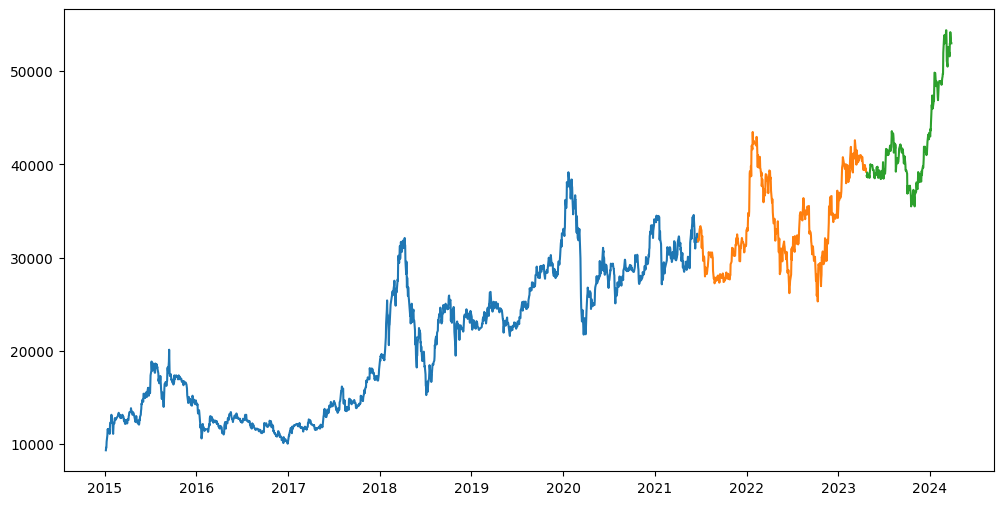

In [404]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')

**Close = Intercept + Beta * lag1**

In [405]:
X_train = train_data['Lag1'].values
Y_train = train_data['Close'].values

In [406]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train.reshape(-1,1), Y_train)
model.score(X_train.reshape(-1,1), Y_train)

0.9948976104558905

In [407]:
lag1_test = test_data['Lag1'].values.reshape(-1,1)

close_price_test = model.predict(lag1_test)
close_price_test
test_data['Close Predict'] = close_price_test.reshape(-1,1)

C:\Users\vanma\AppData\Local\Temp\ipykernel_14772\803965305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Close Predict'] = close_price_test.reshape(-1,1)


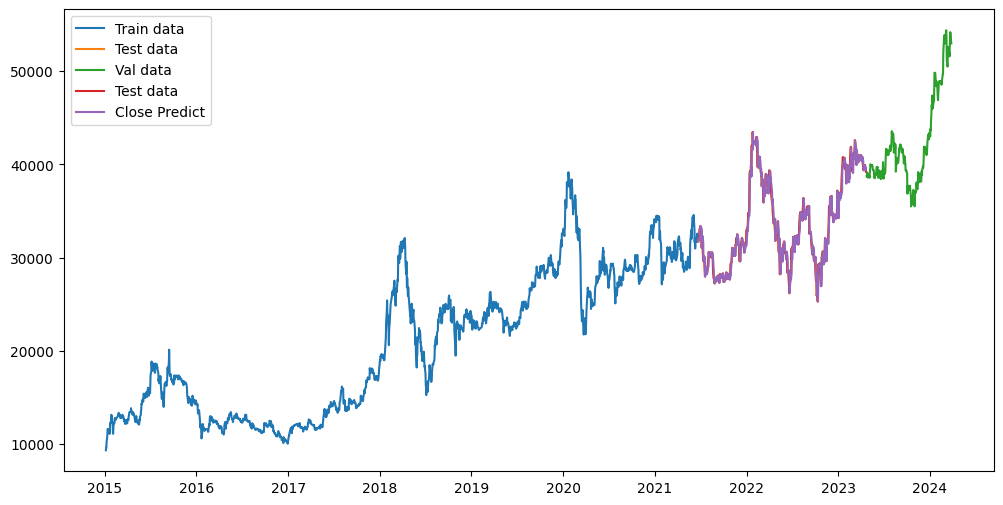

In [408]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(test_data['Close Predict'], label='Close Predict')
plt.legend()
plt.show()

**Close Price prediction up to now**

In [409]:
data_forecasting = yf.download(tickers=stock_code, start="2024-03-27")
data_forecasting
data_forecasting_test = data_forecasting['Close']
data_forecasting_test = data_forecasting_test.values.reshape(-1,1)

[*********************100%%**********************]  1 of 1 completed


In [410]:
data_forecasting_test_predict = model.predict(data_forecasting_test)
data_forecasting_test_predict = data_forecasting_test_predict.reshape(-1,1)

In [411]:
data_forecasting['Close Predict'] = data_forecasting_test_predict


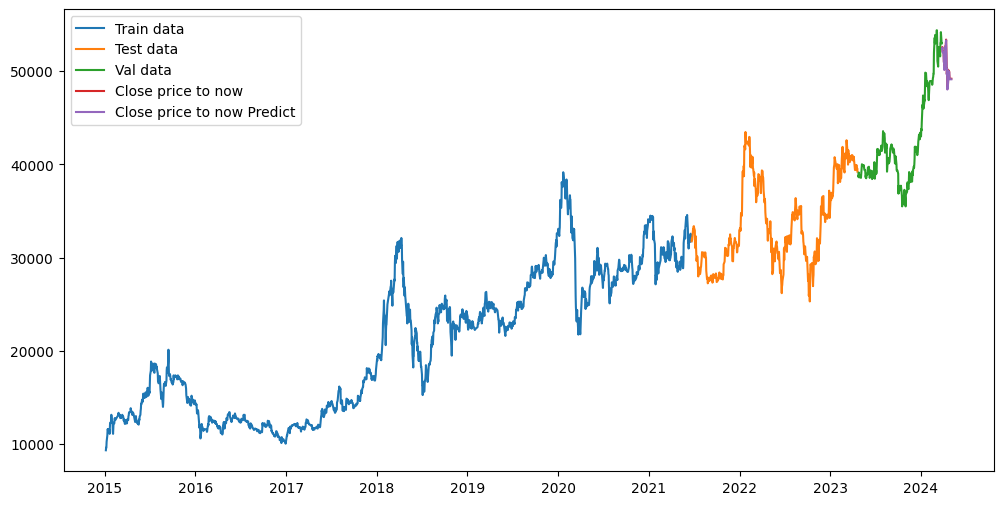

In [412]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')
plt.plot(data_forecasting['Close'], label='Close price to now')
plt.plot(data_forecasting['Close Predict'], label='Close price to now Predict')
plt.legend()
plt.show()

**Close Price prediction up to future**

## CTG

In [413]:
stock_code = "CTG.VN"

In [414]:
import yfinance as yf
import matplotlib.pyplot as plt
data = yf.download(tickers=stock_code, start="2015-01-01", end="2024-03-27")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,9568.436523,9707.109375,9568.436523,9637.772461,9637.772461,87241
2015-01-06,9637.772461,9915.118164,9568.436523,9707.109375,9707.109375,180293
2015-01-07,9707.109375,10053.791992,9707.109375,9984.455078,9984.455078,674377
2015-01-08,9915.118164,9984.455078,9776.445312,9776.445312,9776.445312,437965
2015-01-09,9915.118164,10192.464844,9845.782227,10053.791992,10053.791992,1251158
...,...,...,...,...,...,...
2024-03-20,33200.000000,34500.000000,33000.000000,34350.000000,34350.000000,9923600
2024-03-21,34600.000000,34900.000000,34050.000000,34900.000000,34900.000000,9309200
2024-03-22,35100.000000,36400.000000,35000.000000,35700.000000,35700.000000,16016800


In [415]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2301.000000,2301.000000,2301.000000,2301.000000,2301.000000,2.301000e+03
mean,19257.686488,19535.024169,18997.145930,19249.121391,19249.121391,6.993451e+06
std,6873.650035,6964.190851,6767.423108,6864.342456,6864.342456,6.954459e+06
min,9568.436523,9707.109375,9568.436523,9637.772461,9637.772461,8.724100e+04
25%,13381.943359,13624.621094,13243.270508,13381.943359,13381.943359,2.492505e+06
50%,16294.076172,16571.421875,16051.398438,16294.076172,16294.076172,5.005112e+06
75%,25505.294922,25818.519531,25192.072266,25515.830078,25515.830078,9.256625e+06
max,37788.390625,38065.734375,37303.035156,37719.050781,37719.050781,9.546854e+07


In [416]:
import numpy as np

In [417]:
dataset = data[['Close']]
dataset

,Close
Date,
2015-01-05,9637.772461
2015-01-06,9707.109375
2015-01-07,9984.455078
2015-01-08,9776.445312
2015-01-09,10053.791992
...,...
2024-03-20,34350.000000
2024-03-21,34900.000000
2024-03-22,35700.000000


In [418]:
dataset['Lag1'] = dataset['Close'].shift(1)
dataset = dataset.dropna()
dataset

C:\Users\vanma\AppData\Local\Temp\ipykernel_14772\696873637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Lag1'] = dataset['Close'].shift(1)


,Close,Lag1
Date,,
2015-01-06,9707.109375,9637.772461
2015-01-07,9984.455078,9707.109375
2015-01-08,9776.445312,9984.455078
2015-01-09,10053.791992,9776.445312
2015-01-12,10192.464844,10053.791992
...,...,...
2024-03-20,34350.000000,33300.000000
2024-03-21,34900.000000,34350.000000
2024-03-22,35700.000000,34900.000000


**Spread dataset**

In [419]:
train_size = int(len(dataset) * 0.7)
test_size = int(len(dataset) * 0.2)
val_size = int(len(dataset) * 0.1)

train_size, test_size, val_size

(1610, 460, 230)

In [420]:
train_data = dataset[:train_size]
test_data = dataset[train_size:train_size+test_size]
val_data = dataset[train_size+test_size:]

train_data.shape, test_data.shape, val_data.shape

((1610, 2), (460, 2), (230, 2))

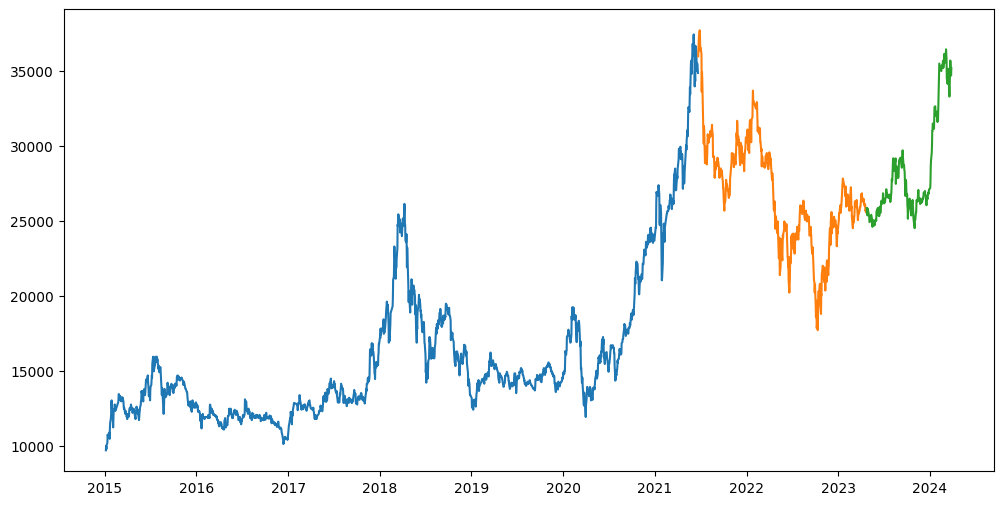

In [421]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')

**Close = Intercept + Beta * lag1**

In [422]:
X_train = train_data['Lag1'].values
Y_train = train_data['Close'].values

In [423]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train.reshape(-1,1), Y_train)
model.score(X_train.reshape(-1,1), Y_train)

0.9931704201312197

In [424]:
lag1_test = test_data['Lag1'].values.reshape(-1,1)

close_price_test = model.predict(lag1_test)
close_price_test
test_data['Close Predict'] = close_price_test.reshape(-1,1)

C:\Users\vanma\AppData\Local\Temp\ipykernel_14772\803965305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Close Predict'] = close_price_test.reshape(-1,1)


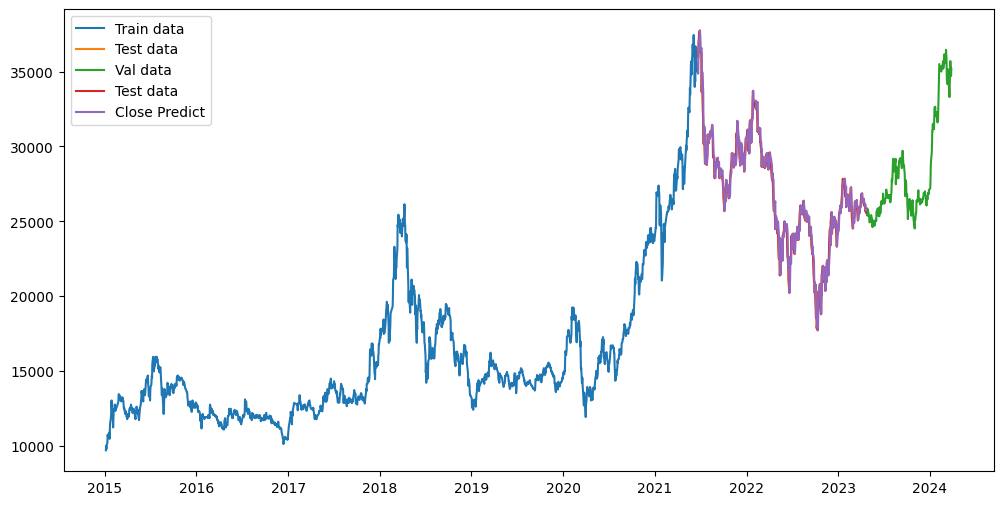

In [425]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(test_data['Close Predict'], label='Close Predict')
plt.legend()
plt.show()

**Close Price prediction up to now**

In [426]:
data_forecasting = yf.download(tickers=stock_code, start="2024-03-27")
data_forecasting
data_forecasting_test = data_forecasting['Close']
data_forecasting_test = data_forecasting_test.values.reshape(-1,1)

[*********************100%%**********************]  1 of 1 completed


In [427]:
data_forecasting_test_predict = model.predict(data_forecasting_test)
data_forecasting_test_predict = data_forecasting_test_predict.reshape(-1,1)

In [428]:
data_forecasting['Close Predict'] = data_forecasting_test_predict


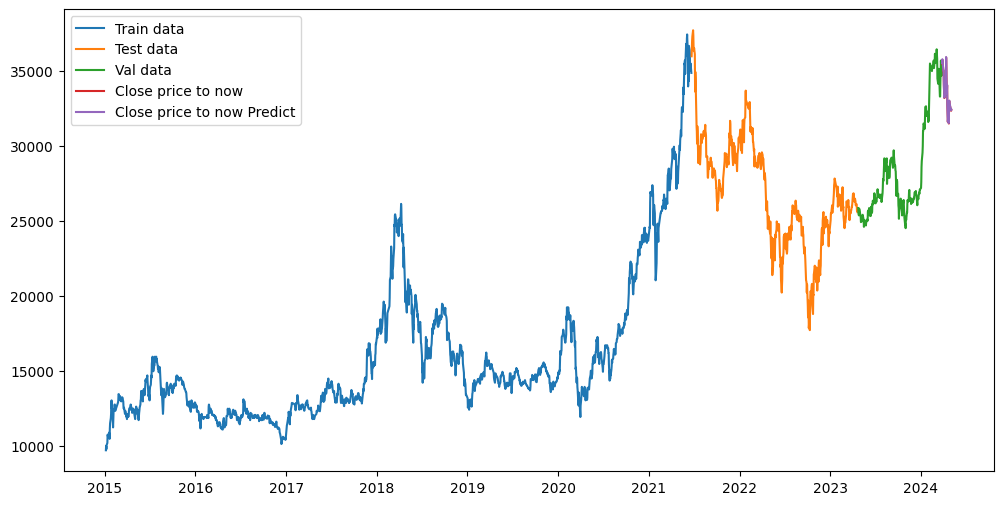

In [429]:
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train data')
plt.plot(test_data['Close'], label='Test data')
plt.plot(val_data['Close'], label='Val data')
plt.plot(data_forecasting['Close'], label='Close price to now')
plt.plot(data_forecasting['Close Predict'], label='Close price to now Predict')
plt.legend()
plt.show()

**Close Price prediction up to future**